<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/2129014_%EB%B0%95%EC%A7%80%ED%98%84_%ED%86%B5%EA%B3%84%ED%95%99%EA%B3%BC_%EA%B8%B0%EA%B3%84%EB%A1%A0_%EC%A4%91%EA%B0%84%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Smoker status Prediction** 분석 > (데이터는 아래의 링크로도, zip파일로도 다운로드 가능합니다!)
## **2129014_박지현_통계학과**
## - **사용 모델**
### **(1) XGBoost Classifier**
### **(2) Random Forest Classifier**
### **(3) CatBoost Classifier**

### ▶ **사용 데이터 : Smoker status Prediction 데이터**
- 다양한 데이터와 다양한 데이터 분석 경연이 열리는 캐글(Kaggle)에서 과거에 경연에서의 데이터(Tabular Playground Series=인공적으로 생성하여 그 수를 늘린 데이터셋)
- https://www.kaggle.com/competitions/playground-series-s3e24/overview
- 생체신호를 이용한 흡연자의 이중상태, 즉 흡연 여부 예측
- train.csv : 훈련 데이터 세트 - 흡연(['smoking'])이 이진 분류 대상
- test.csv : 테스트 데이터 세트 - 흡연에 해당하는 특성이 빠져있는 데이터셋
- sample_submission.csv : 캐글에 제출해야 하는 양식에 맞춘 파일

▶ 데이터는 159256개의 훈련 데이터셋, 106171개의 테스트 데이터셋, **23개의 feature 및 1개의 target feature**가 있음

target feature 'smoking' : 흡연 여부, 0 or 1

**feature**

(1) id : 인물 아이디, 각각의 인물 구별을 위함

(2) age : 나이

(3) height(cm) : 키

(4) weight(kg) : 몸무게

(5) waist(cm) : 허리

(6) eyesight(left) : 시력(왼쪽)

(7) eyesight(right) : 시력(오른쪽)

(8) hearing(left) : 청력(왼쪽)

(9) hearing(right) : 청력(오른쪽)

(10) systolic : 수축기 혈압

(11) relaxation : 이완기 혈압

(12) fasting blood sugar : 공복혈당

(13) Cholesterol : 콜레스테롤

(14) triglyceride : 중성지방

(15) HDL : 고밀도 지단백 콜레스테롤

(16) LDL : 저밀도 지단백 콜레스테

(17) hemoglobin : 헤모글로빈

(18) Urine protein : 소변 단백질(=요단백)

(19) serum creatinine : 혈청 크레아티닌

(20) AST : 혈청지오티 AST

(21) ALT: 혈청지오티 ALT

(22) Gtp : 감마 지티피

(23) dental caries : 충치 등 치과 진료

## 0. 필요한 패키지 임포트 및 다운로드

In [1]:
!pip install catboost

In [2]:
# 기본 패키지 가져오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time


## 데이터 전처리
from sklearn.preprocessing import StandardScaler  # 연속변수의 표준화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import LabelEncoder    # 범주형 변수 수치화
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, cross_val_predict



## 사용할 모델
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier      # AdaBoosting
from lightgbm import LGBMClassifier

## 위의 모델들을 합칠 때 사용할 voting
from sklearn.ensemble import VotingClassifier        # Majority Voting


## 모델검정 패키지
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, roc_auc_score, precision_score

# confusion_matrix 그릴 패키지
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


## 2. 데이터 읽어오기
- 데이터가 있는 경로로 수정이 필요합니다.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "/content/gdrive/My Drive/Colab Notebooks/MLData/mid_project/"


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
# 데이터 읽어오기

train_df = pd.read_csv(file_path + 'train.csv')
test_df = pd.read_csv(file_path + 'test.csv')
sample_submission = pd.read_csv(file_path + "sample_submission.csv")

print(train_df.shape)    # 1만개 data
print(test_df.shape)

(159256, 24)
(106171, 23)


In [5]:
# train 데이터셋의 생김새 확인하기

train_df.head(10)


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
5,5,50,170,55,51.0,1.2,1.2,1,1,146,...,31,99,15.9,1,0.7,24,42,119,1,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
7,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
9,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [6]:

train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [7]:

train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,159256.0,44.306626,11.842286,20.0,40.00,40.0,55.00,85.0
height(cm),159256.0,165.266929,8.818970,135.0,160.00,165.0,170.00,190.0
weight(kg),159256.0,67.143662,12.586198,30.0,60.00,65.0,75.00,130.0
waist(cm),159256.0,83.001990,8.957937,51.0,77.00,83.0,89.00,127.0
eyesight(left),159256.0,1.005798,0.402113,0.1,0.80,1.0,1.20,9.9
eyesight(right),159256.0,1.000989,0.392299,0.1,0.80,1.0,1.20,9.9
hearing(left),159256.0,1.023974,0.152969,1.0,1.00,1.0,1.00,2.0
hearing(right),159256.0,1.023421,0.151238,1.0,1.00,1.0,1.00,2.0
systolic,159256.0,122.503648,12.729315,77.0,114.00,121.0,130.00,213.0


> 피쳐 포함 총 24개의 feature가 모두 숫자형이다 > 따로 Labelencoding 할 필요 X!

In [8]:
# train 데이터의 타겟 피처 양성 비율 확인하기

train_df['smoking'].value_counts()

# 이 정도면 균일한 데이터로 볼 수 있을 것이다.

0    89603
1    69653
Name: smoking, dtype: int64

In [9]:
# missing values 체크

train_df.isnull().sum()

# missing values 없으므로 결측치 처리가 생략 가능하다!

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

## 2. id 변수 제거

In [10]:
# id : 각각의 인물의 식별을 위한 것 > 따라서 분류와 관련이 없으므로 제거 해줌

train_copy = train_df.drop(['id'],axis=1).copy()
# 제대로 드롭되었는지 확인하기!
train_copy   # 실제로 조정해줄 데이터셋!

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,...,55,80,14.4,1,1.1,22,17,37,0,1


## 3. Data Analysis : 어떤 모양의 데이터인지 확인하고 조정하기

### 0. 전체적인 데이터 분포 알아보기

In [11]:
# 각 변수의 상관계수 구하기
train_copy.corr()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,0.064924,...,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033
height(cm),-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,0.114390,...,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111
weight(kg),-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,0.265921,...,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748
waist(cm),-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,0.291389,...,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715
eyesight(left),-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,0.010324,...,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420
eyesight(right),-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,0.017073,...,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781
hearing(left),0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,-0.011739,...,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219
hearing(right),0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,-0.015248,...,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858
systolic,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,0.753003,...,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642
relaxation,0.064924,0.114390,0.265921,0.291389,0.010324,0.017073,-0.011739,-0.015248,0.753003,1.000000,...,-0.127218,0.073838,0.230445,-0.020445,0.091648,0.090398,0.130043,0.186684,0.023915,0.109501


In [12]:
train_copy.corr()['smoking']

age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
hearing(left)         -0.038219
hearing(right)        -0.036858
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
Urine protein         -0.028548
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
Name: smoking, dtype: float64

- correlation이 -0.03이라면 거의 관계가 없다는 뜻이므로, 이후 hearing(left), hearing(right), Urine protein는 삭제하겠다!

Text(0.5, 1.0, 'Smoking data correlation')

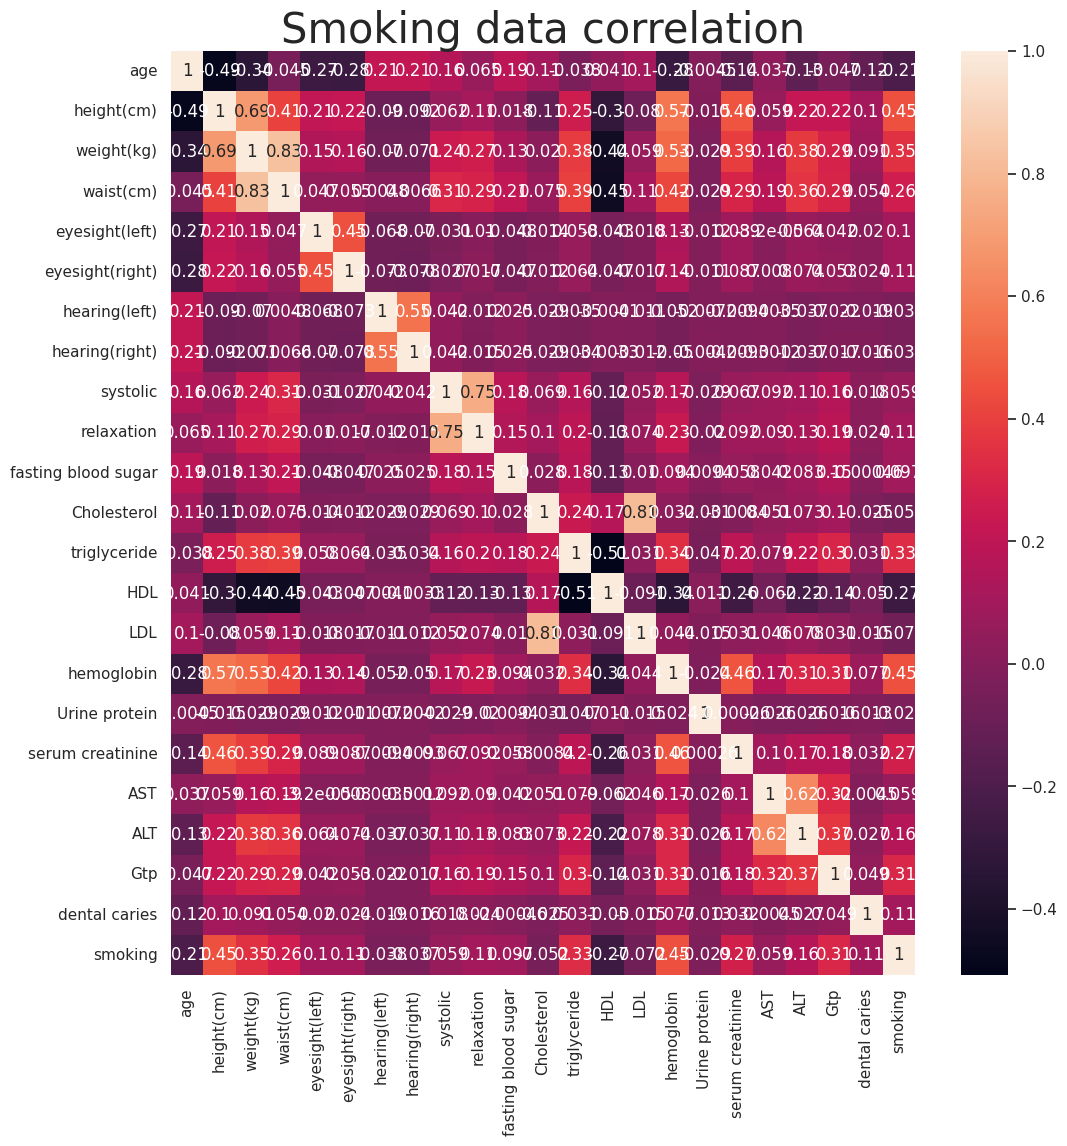

In [13]:
# 위의 correlation 시각화하기
sns.set(style="white")

cor = train_copy.corr()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor, annot=True)

plt.title('Smoking data correlation', size=30)

- 또한, 이후 여러 변수들에 대한 plot을 하나하나 그리기 번거로우므로, 함수를 만들어준다.

In [14]:
def diagnostic_plots(df, df_variable):
    plt.figure(figsize=(18, 3))

    plt.subplot(1, 3, 1)
    plt.hist(df_variable)
    plt.legend(loc='best')
    plt.title('whole data histogram')

    plt.subplot(1, 3, 2)
    # smoking=0인 변수의 분포
    plt.hist(df_variable[df['smoking']==0])
    plt.title('Smoking=0 data histogram')

    plt.subplot(1, 3, 3)
    # smoking=0인 변수의 분포
    plt.hist(df_variable[df['smoking']==1])
    plt.title('Smoking=1 data histogram')

    plt.show()

(array([12969., 11465., 13081., 65171., 15769., 13448., 22681.,  2230.,
         1760.,   682.]),
 array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
 <BarContainer object of 10 artists>)

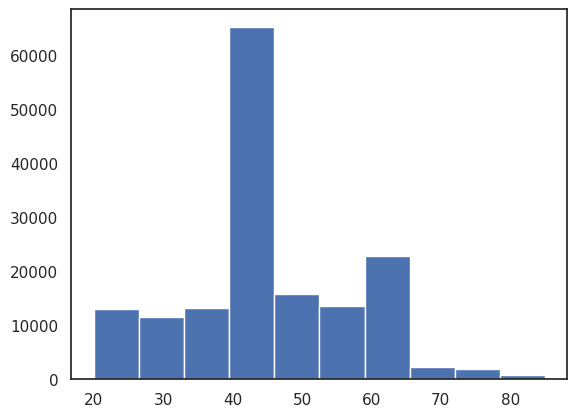

In [15]:
plt.hist(train_copy['age'])

### 1) Age
- 나이 변수를 확인해보자.

In [16]:
train_copy['age'].value_counts()

40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: age, dtype: int64

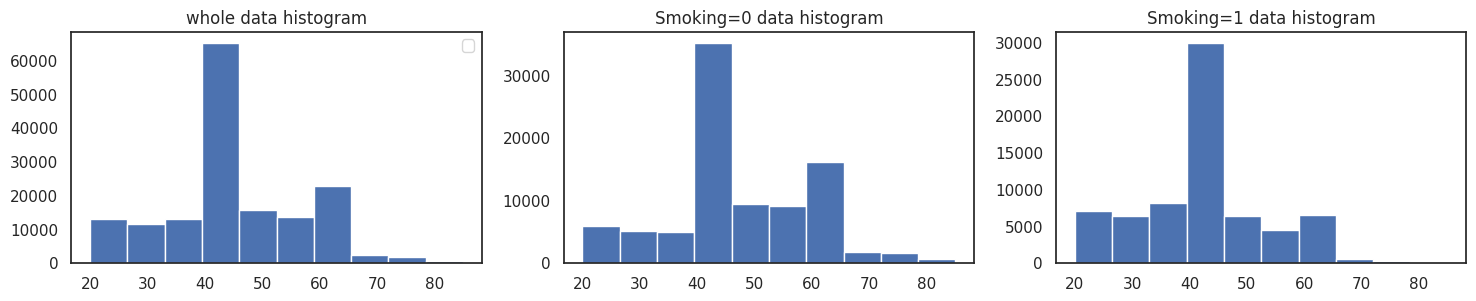

In [17]:
diagnostic_plots(train_copy, train_copy['age'])

> 결과 : 40 ~ 50대의 수가 가장 많은 것은 둘 다 마찬가지지만, 20~40대 사이의 분포가 조금 다른 것을 확인할 수 있다.

- 기존 변수들 간의 상관관계가 높아지겠지만, 'smoking'과 상관관계가 높은 변수이므로 기존 변수를 유지하겠다.

### 2) 키, 몸무게
- 신체지수 중 하나인 BMI를 도입해보자.
- BMI = 체중(kg) / 신장(m)²

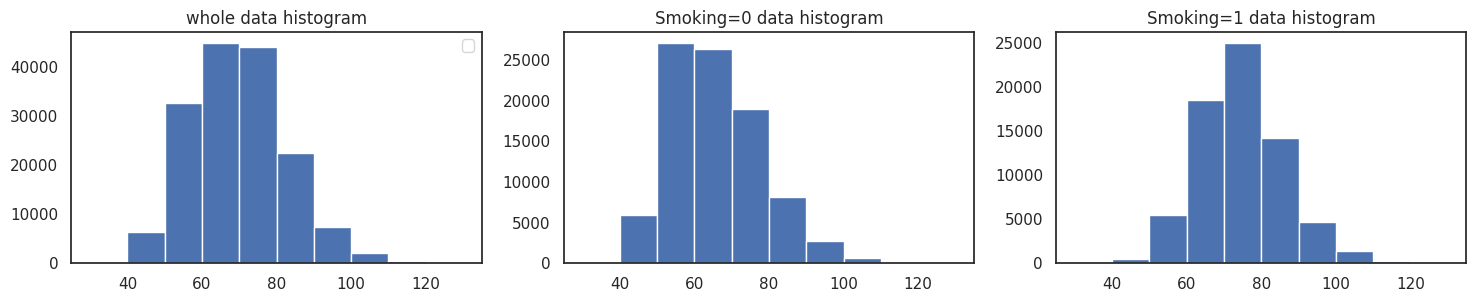

In [18]:
diagnostic_plots(train_copy, train_copy['weight(kg)'])

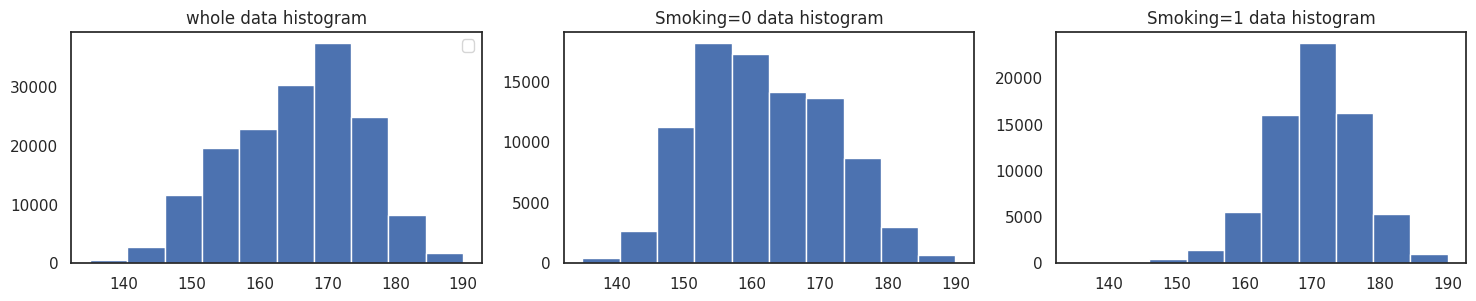

In [19]:
diagnostic_plots(train_copy, train_copy['height(cm)'])

In [20]:
train_copy['BMI'] = train_copy['weight(kg)'] / ((train_copy['height(cm)']/100) ** 2)

### 3) systolic, relaxation
- 정상 혈압은 수축기 혈압과 이완기 혈압이 모두 120mmHg과 80mmHg 미만일 때로 정의한다.
- 이 데이터셋에서는 그 기준을 각각 적용해보겠다. > 큰 효과는 없는 것 같아서 삭제했다.

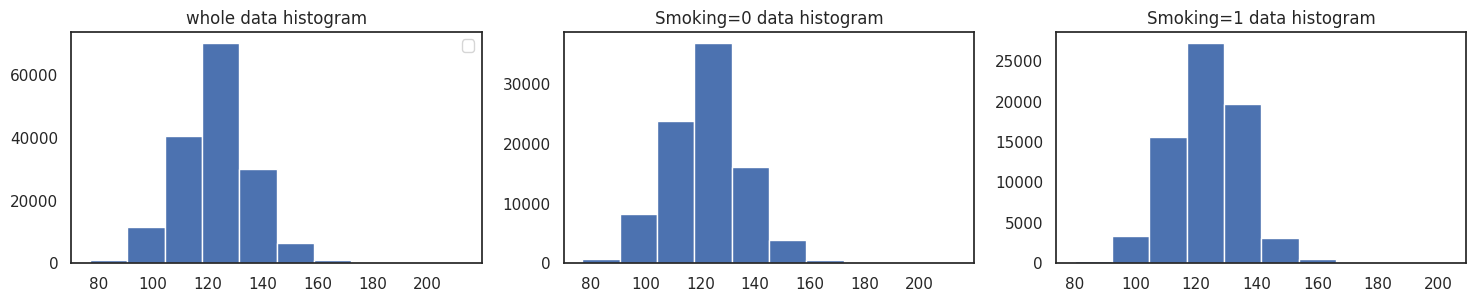

In [21]:
diagnostic_plots(train_copy, train_copy['systolic'])

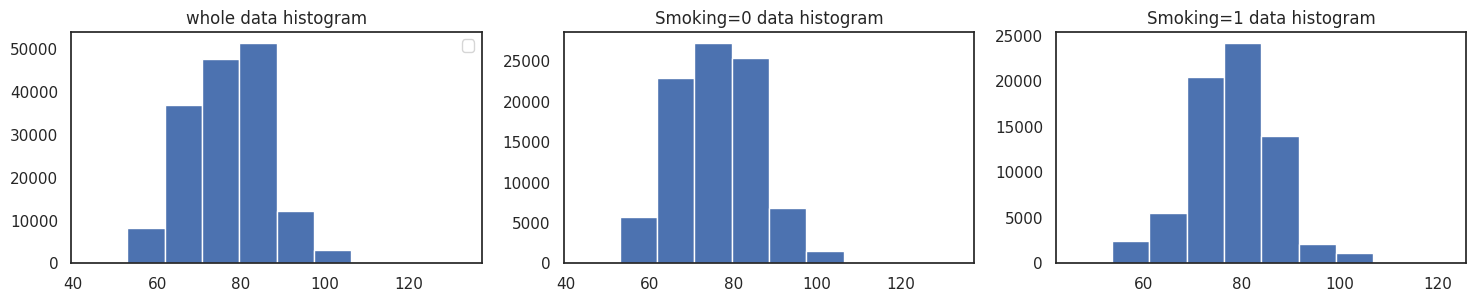

In [22]:
diagnostic_plots(train_copy, train_copy['relaxation'])

In [23]:
blood_list = []
def blood_pressure(sys, rel):
    if (sys < 120 ) and (rel < 80):
        return 0
    else:
        return 1

for i in range(len(train_copy)):
    num = blood_pressure(train_copy['systolic'][i], train_copy['relaxation'][i])
    blood_list.append(num)

train_copy['blood_pressure'] = blood_list

- 기존 변수들 간의 상관관계가 높아지겠지만, 'smoking'과 상관관계가 높은 변수이므로 기존 변수를 유지하겠다.

### 4) hearing['left'], hearing['right'], Urine protein

- 청력과 흡연 여부는 correlation = 0.03으로 거의 관계가 없다고 보아도 무방하고, 또한 우리의 지식 속에서도 그것이 자연스러워 보인다.
- 요단백 Urine protein 또한 correlation이 매우 작으므로 마찬가지로 관계가 없다고 보아도 무방할 것이다.
> 그러므로, 세 변수를 삭제해주겠다!

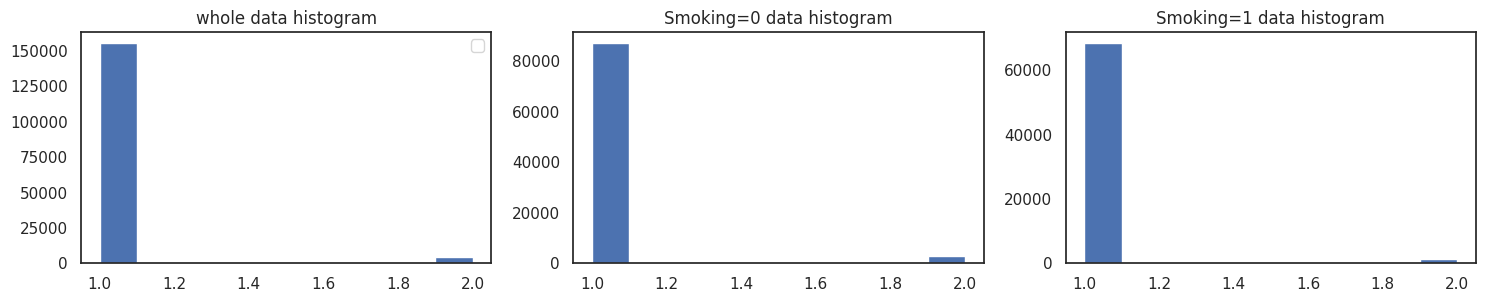

In [24]:
diagnostic_plots(train_copy, train_copy['hearing(left)'])

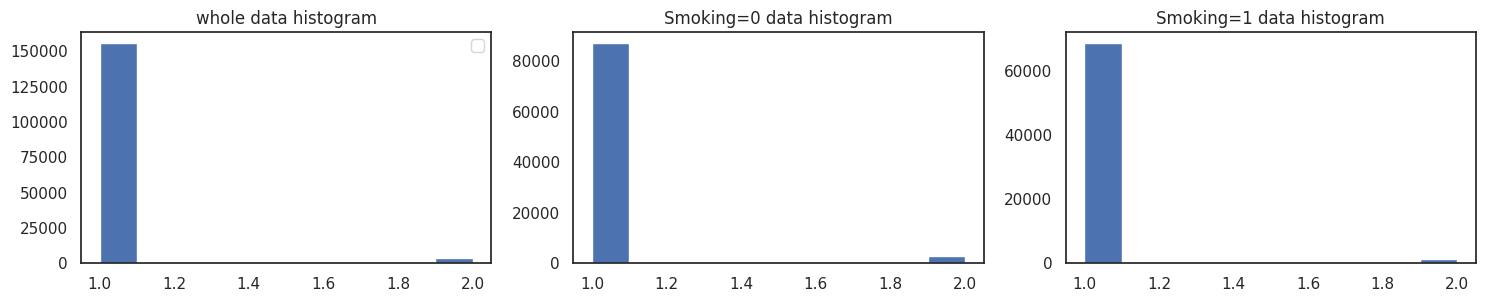

In [25]:
diagnostic_plots(train_copy, train_copy['hearing(right)'])

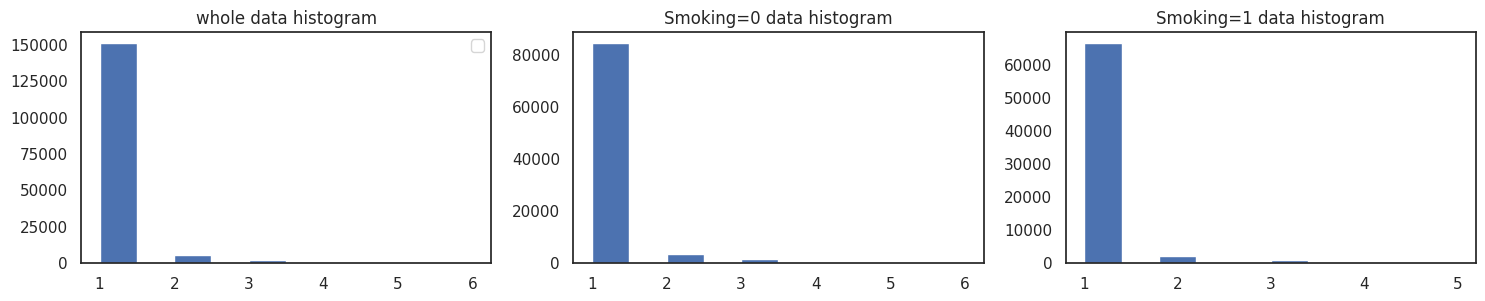

In [26]:
diagnostic_plots(train_copy, train_copy['Urine protein'])

In [27]:
train_copy = train_copy.drop(['hearing(left)', 'hearing(right)','Urine protein'],axis=1)

train_copy

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,blood_pressure
0,55,165,60,81.0,0.5,0.6,135,87,94,172,...,75,16.5,1.0,22,25,27,0,1,22.038567,1
1,70,165,65,89.0,0.6,0.7,146,83,147,194,...,126,16.2,1.1,27,23,37,1,0,23.875115,1
2,20,170,75,81.0,0.4,0.5,118,75,79,178,...,93,17.4,0.8,27,31,53,0,1,25.951557,0
3,35,180,95,105.0,1.5,1.2,131,88,91,180,...,102,15.9,1.0,20,27,30,1,0,29.320988,1
4,30,165,60,80.5,1.5,1.0,121,76,91,155,...,93,15.4,0.8,19,13,17,0,1,22.038567,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,127,80,64,238,...,159,14.5,0.8,25,26,13,0,0,18.730489,1
159252,50,155,75,82.0,1.0,1.0,120,80,89,213,...,108,14.5,0.6,21,20,18,0,0,31.217482,1
159253,40,160,50,66.0,1.5,1.0,114,70,84,189,...,93,10.9,0.6,15,9,12,0,0,19.531250,0
159254,50,165,75,92.0,1.2,1.0,121,90,122,165,...,80,14.4,1.1,22,17,37,0,1,27.548209,1


### 5)'hemoglobin', 'triglyceride', 'Gtp'
- 앞에서 시각화하지 않은 변수들 중 상관계수가 높은 'hemoglobin', 'triglyceride', 'Gtp'을 마저 시각화해 보겠다.

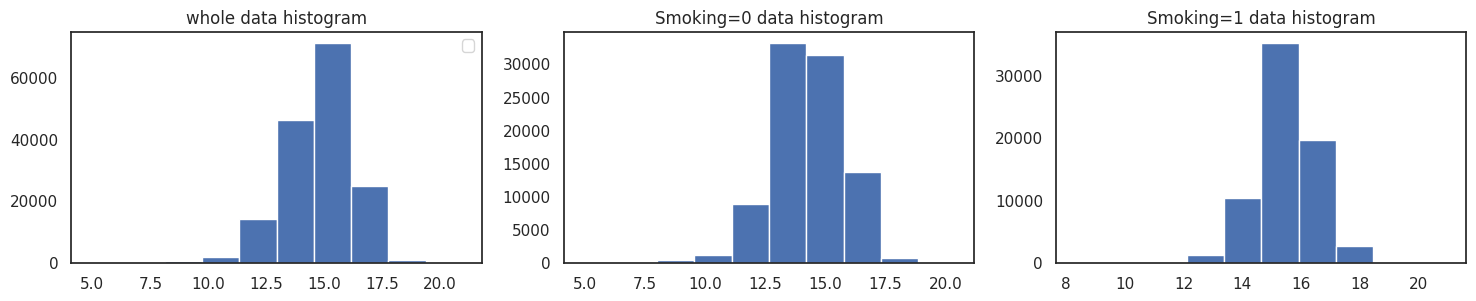

In [28]:
# 'hemoglobin'
diagnostic_plots(train_copy, train_copy['hemoglobin'])

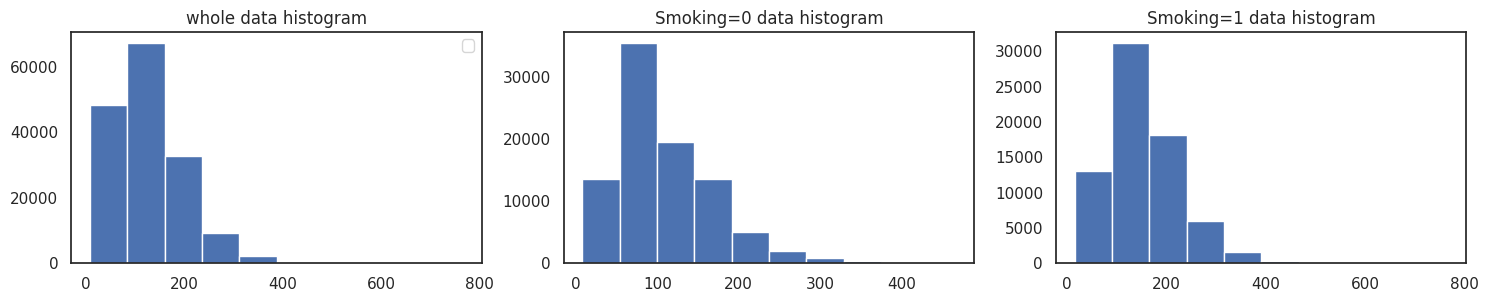

In [29]:
# 'triglyceride'
diagnostic_plots(train_copy, train_copy['triglyceride'])

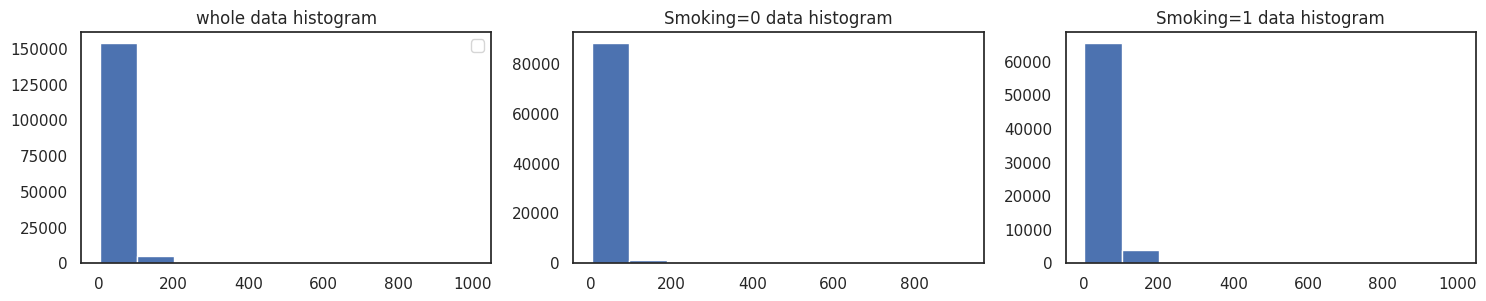

In [30]:
# 'Gtp'
diagnostic_plots(train_copy, train_copy['Gtp'])

### 6) 정리

In [31]:
# 이렇게 조정한 최종 train set의 correlation 확인하기!
train_copy.corr()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,blood_pressure
age,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.160437,0.064924,0.191913,0.106873,...,0.103529,-0.280851,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033,-0.077638,0.120013
height(cm),-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,0.062297,0.114390,0.017516,-0.113455,...,-0.080001,0.568739,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111,0.167678,0.073009
weight(kg),-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,0.241495,0.265921,0.132409,0.020382,...,0.059438,0.527259,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748,0.827517,0.223135
waist(cm),-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.306150,0.291389,0.209541,0.075039,...,0.114552,0.418245,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715,0.818023,0.270962
eyesight(left),-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.030718,0.010324,-0.048066,-0.014211,...,-0.018312,0.134314,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420,0.045670,-0.019286
eyesight(right),-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.026931,0.017073,-0.047424,-0.011569,...,-0.016913,0.140602,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781,0.053130,-0.014152
systolic,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,1.000000,0.753003,0.176127,0.069044,...,0.052032,0.174904,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642,0.285277,0.753467
relaxation,0.064924,0.114390,0.265921,0.291389,0.010324,0.017073,0.753003,1.000000,0.152416,0.100405,...,0.073838,0.230445,0.091648,0.090398,0.130043,0.186684,0.023915,0.109501,0.276934,0.647004
fasting blood sugar,0.191913,0.017516,0.132409,0.209541,-0.048066,-0.047424,0.176127,0.152416,1.000000,0.028153,...,0.010165,0.094061,0.057923,0.041653,0.082907,0.148289,-0.000463,0.096534,0.172690,0.148349
Cholesterol,0.106873,-0.113455,0.020382,0.075039,-0.014211,-0.011569,0.069044,0.100405,0.028153,1.000000,...,0.808533,0.032104,-0.008407,0.051192,0.072839,0.099871,-0.024974,-0.051896,0.107801,0.070668


In [32]:
train_copy.corr()['smoking']

age                   -0.206033
height(cm)             0.447111
weight(kg)             0.351748
waist(cm)              0.262715
eyesight(left)         0.100420
eyesight(right)        0.109781
systolic               0.058642
relaxation             0.109501
fasting blood sugar    0.096534
Cholesterol           -0.051896
triglyceride           0.331975
HDL                   -0.271186
LDL                   -0.072285
hemoglobin             0.450679
serum creatinine       0.272979
AST                    0.059394
ALT                    0.163016
Gtp                    0.305561
dental caries          0.106636
smoking                1.000000
BMI                    0.141723
blood_pressure         0.073893
Name: smoking, dtype: float64

Text(0.5, 1.0, 'Smoking data correlation')

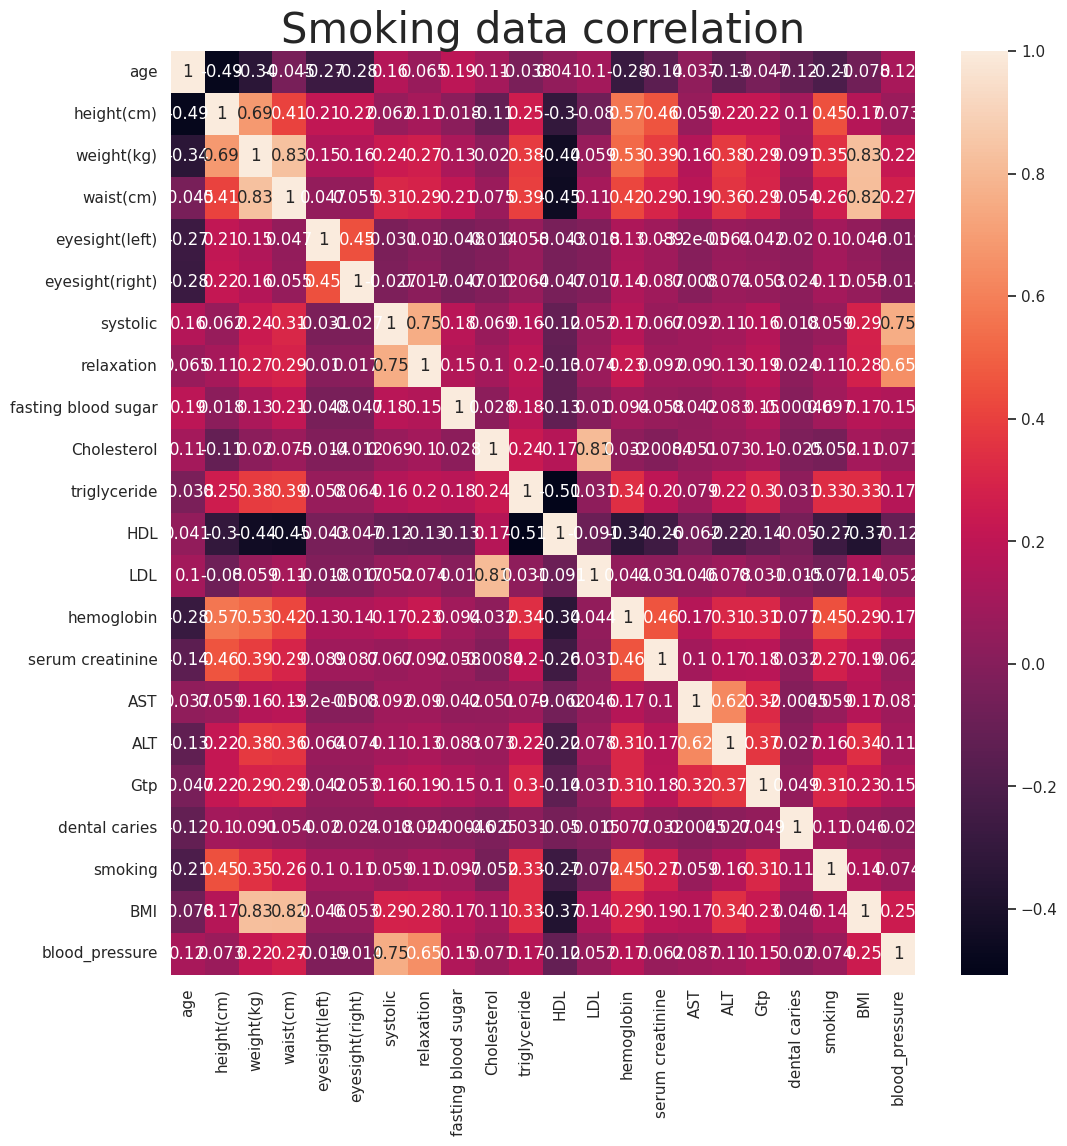

In [33]:
# 위의 correlation 시각화하기
sns.set(style="white")

cor_2 = train_copy.corr()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cor_2, annot=True)

plt.title('Smoking data correlation', size=30)

## 3. 분석을 위해 데이터 조정하기
 모두 범위가 다양한 숫자형 변수이므로, 표준화가 필요하다. MinMaxScaler()와 StandardScaler() 중 MinMaxScaler()를 사용하기로 하자.

In [34]:
# 다양한 분석 모델을 사용 예정이므로 Target feature를 제외한 나머지 feature들은 Feature Scaling을 적용

scaler = MinMaxScaler()

X, y = train_copy.drop(['smoking'],axis=1), train_copy['smoking']
X_scale = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((127404, 21), (127404,)), ((31852, 21), (31852,)))

## 4. 모델 생성 후 학습하기
 - 모두 디폴트 모델을 사용한다!
 > 이유: GridsearchCV로 돌려보았으나, 한두개만 최적화하려고 해도, 변수의 수와 데이터 수가 많아 시간이 너무 오래 걸렸다. 이후 회귀 모델에서 적절한 len() 수의 데이터로 프로젝트를 진행해 보충하겠다.

In [35]:
# 결과 저장할 리스트 생성
acc = []
recall = []
roc_auc = []
precision = []

### (1) Xgboost 모델

In [36]:
xgb = XGBClassifier(random_state=42)

# perf_counter 함수: 코드의 연산 시간 외에 sleep, file io 등 pending에 들어가는 시간까지 모두 포함해서 측정

training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()

xgb_train_time = training_end - training_start

print("◎ Time consumed for training: %4.3f seconds" % (xgb_train_time))

◎ Time consumed for training: 1.642 seconds


In [37]:
prediction_start = time.perf_counter()
xgb_pred = xgb.predict(X_test)
prediction_end = time.perf_counter()

xgb_prediction_time = prediction_end - prediction_start

print("◎ Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

◎ Time consumed for prediction: 0.07073 seconds


In [38]:
# 학습 잘 되었는지 확인하기!

acc.append(round(accuracy_score(y_test, xgb_pred),4))
print("Xgboost accuracy : ", round(accuracy_score(y_test, xgb_pred),4))

recall.append(round(recall_score(y_test, xgb_pred),4))
print("Xgboost recall : ", round(recall_score(y_test, xgb_pred),4))

roc_auc.append(round(roc_auc_score(y_test, xgb_pred),4))
print("Xgboost roc_auc_score : ", round(roc_auc_score(y_test, xgb_pred),4))

precision.append(round(precision_score(y_test, xgb_pred),4))
print("Xgboost precision : ", round(precision_score(y_test, xgb_pred),4))

Xgboost accuracy :  0.7797
Xgboost recall :  0.8037
Xgboost roc_auc_score :  0.7822
Xgboost precision :  0.7266


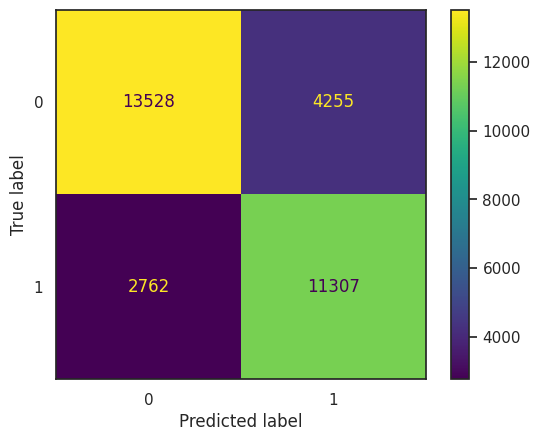

In [39]:
# confusion matrix 확인해보기

cm_xgb = confusion_matrix(y_test, xgb_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0,1])

disp.plot()

plt.show()


### (2) RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=42)

# perf_counter 함수: 코드의 연산 시간 외에 sleep, file io 등 pending에 들어가는 시간까지 모두 포함해서 측정

training_start = time.perf_counter()
rf.fit(X_train, y_train)
training_end = time.perf_counter()

rf_train_time = training_end - training_start

print("◎ Time consumed for training: %4.3f seconds" % (rf_train_time))

◎ Time consumed for training: 40.105 seconds


In [41]:
prediction_start = time.perf_counter()
rf_pred = rf.predict(X_test)
prediction_end = time.perf_counter()

rf_prediction_time = prediction_end - prediction_start

print("◎ Time consumed for prediction: %6.5f seconds" % (rf_prediction_time))

◎ Time consumed for prediction: 1.10135 seconds


In [42]:
# 학습 잘 되었는지 확인하기!

acc.append(round(accuracy_score(y_test, rf_pred),4))
print("Random Forest Classifier accuracy : ", round(accuracy_score(y_test, rf_pred),4))

recall.append(round(recall_score(y_test, rf_pred),4))
print("Random Forest Classifier recall : ", round(recall_score(y_test, rf_pred),4))

roc_auc.append(round(roc_auc_score(y_test, rf_pred),4))
print("Random Forest Classifier roc_auc_score : ", round(roc_auc_score(y_test, rf_pred),4))

precision.append(round(precision_score(y_test, rf_pred),4))
print("Random Forest Classifier precision : ", round(precision_score(y_test, rf_pred),4))

Random Forest Classifier accuracy :  0.7721
Random Forest Classifier recall :  0.7993
Random Forest Classifier roc_auc_score :  0.775
Random Forest Classifier precision :  0.7172


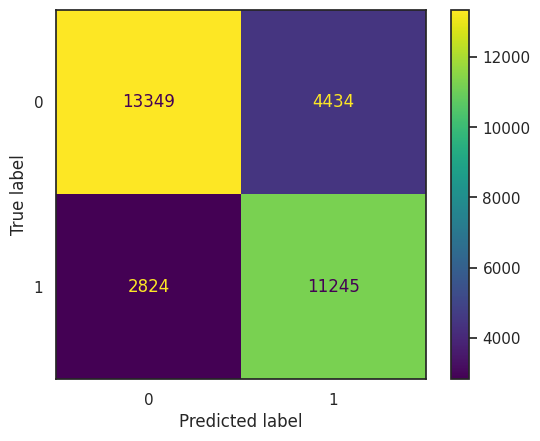

In [43]:
# confusion matrix 확인해보기

cm_rf = confusion_matrix(y_test, rf_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1])

disp.plot()

plt.show()


### 3) Catboost

In [44]:
cat = CatBoostClassifier(verbose=False, random_state=42)

# perf_counter 함수: 코드의 연산 시간 외에 sleep, file io 등 pending에 들어가는 시간까지 모두 포함해서 측정

training_start = time.perf_counter()
cat.fit(X_train, y_train, eval_set=(X_test, y_test))
training_end = time.perf_counter()

cat_train_time = training_end - training_start

print("◎ Time consumed for training: %4.3f seconds" % (cat_train_time))

◎ Time consumed for training: 54.530 seconds


In [45]:
prediction_start = time.perf_counter()
cat_pred = cat.predict(X_test)
prediction_end = time.perf_counter()

cat_prediction_time = prediction_end - prediction_start

print("◎ Time consumed for prediction: %6.5f seconds" % (cat_prediction_time))

◎ Time consumed for prediction: 0.52094 seconds


In [46]:
# 학습 잘 되었는지 확인하기!

acc.append(round(accuracy_score(y_test, cat_pred),4))
print("Catboost accuracy : ", round(accuracy_score(y_test, cat_pred),4))

recall.append(round(recall_score(y_test, cat_pred),4))
print("Catboost recall : ", round(recall_score(y_test, cat_pred),4))

roc_auc.append(round(roc_auc_score(y_test, cat_pred),4))
print("Catboost roc_auc_score : ", round(roc_auc_score(y_test, cat_pred),4))

precision.append(round(precision_score(y_test, cat_pred),4))
print("Catboost precision : ", round(precision_score(y_test, cat_pred),4))

Catboost accuracy :  0.7805
Catboost recall :  0.8052
Catboost roc_auc_score :  0.7831
Catboost precision :  0.7271


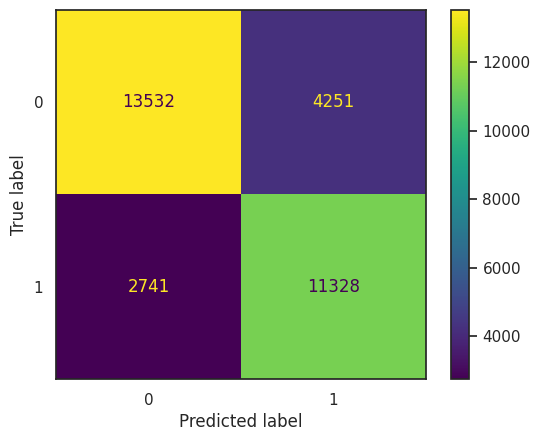

In [47]:
# confusion matrix 확인해보기

cm_cat = confusion_matrix(y_test, cat_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=[0,1])

disp.plot()

plt.show()


## 5. 만든 모델들을 Voting으로 합친 모델의 성능과 비교하기
- 하드 보팅과 소프트 보팅 모두 사용해보자!

- 하드 보팅

In [48]:
voting_estimators = [('Xgboost', xgb), ('random forest classifier', rf), ('catboost', cat)]

# (4) Voting 모델 - hard
voting_h = VotingClassifier(estimators = voting_estimators,
                          voting='hard')

voting_h.fit(X_train, y_train)
vot_h_pred = voting_h.predict(X_test)

In [49]:
# 학습 잘 되었는지 확인하기!

acc.append(round(accuracy_score(y_test, vot_h_pred),4))
print("Voting accuracy : ", round(accuracy_score(y_test, vot_h_pred),4))

recall.append(round(recall_score(y_test, vot_h_pred),4))
print("Voting recall : ", round(recall_score(y_test, vot_h_pred),4))

roc_auc.append(round(roc_auc_score(y_test, vot_h_pred),4))
print("Voting roc_auc_score : ", round(roc_auc_score(y_test, vot_h_pred),4))

precision.append(round(precision_score(y_test, vot_h_pred),4))
print("Voting precision : ", round(precision_score(y_test, vot_h_pred),4))

Voting accuracy :  0.7807
Voting recall :  0.8099
Voting roc_auc_score :  0.7838
Voting precision :  0.7256


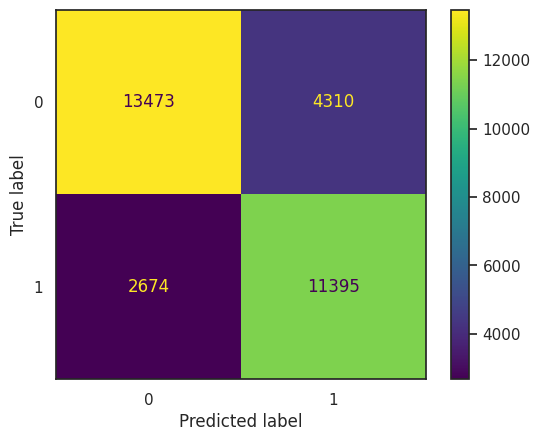

In [50]:
# confusion matrix 확인해보기
vot_hard = confusion_matrix(y_test, vot_h_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=vot_hard, display_labels=[0,1])

disp.plot()

plt.show()


- 소프트보팅

In [51]:
voting_estimators = [('Xgboost', xgb), ('random forest classifier', rf), ('catboost', cat)]

# (4) Voting 모델 - soft
voting_s = VotingClassifier(estimators = voting_estimators,
                          voting='soft')

voting_s.fit(X_train, y_train)
vot_s_pred = voting_s.predict(X_test)

In [52]:
# 학습 잘 되었는지 확인하기!

acc.append(round(accuracy_score(y_test, vot_s_pred),4))
print("Voting accuracy : ", round(accuracy_score(y_test, vot_s_pred),4))

recall.append(round(recall_score(y_test, vot_s_pred),4))
print("Voting recall : ", round(recall_score(y_test, vot_s_pred),4))

roc_auc.append(round(roc_auc_score(y_test, vot_s_pred),4))
print("Voting roc_auc_score : ", round(roc_auc_score(y_test, vot_s_pred),4))

precision.append(round(precision_score(y_test, vot_s_pred),4))
print("Voting precision : ", round(precision_score(y_test, vot_s_pred),4))

Voting accuracy :  0.7806
Voting recall :  0.8134
Voting roc_auc_score :  0.784
Voting precision :  0.724


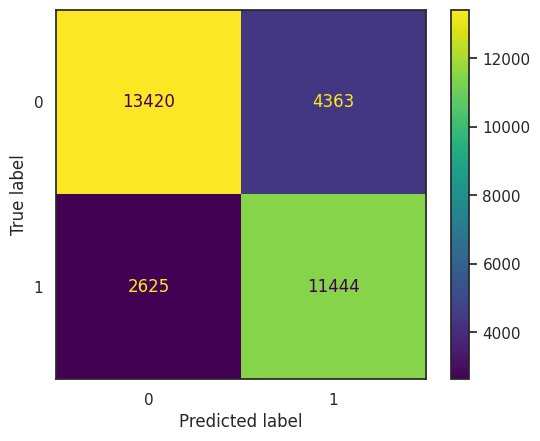

In [53]:
# confusion matrix 확인해보기
vot_soft = confusion_matrix(y_test, vot_s_pred, labels=[0,1])

disp = ConfusionMatrixDisplay(confusion_matrix=vot_soft, display_labels=[0,1])

disp.plot()

plt.show()


## 6. 정리
- 캐글의 경우, 흡연 여부의 '확률'(즉, pred_proba()를 통해 계산한 결과)을 계산하여 제출해야 한다. 또한, 하루 1개만 제출 가능하므로, 바로 5개의 성능을 비교하기 적절하지 않아, 임의로 train 데이터셋에서 test를 나누어 성능을 비교하였다.

In [54]:
result_final = pd.DataFrame({'Accuracy':acc,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision},
                          index=['XGbBoost', 'RandomForest_Classifier', 'Catboost', 'Voting_hard', 'Voting_soft'])

result_final

,Accuracy,Recall,Roc_Auc,Precision
XGbBoost,0.7797,0.8037,0.7822,0.7266
RandomForest_Classifier,0.7721,0.7993,0.7750,0.7172
Catboost,0.7805,0.8052,0.7831,0.7271
Voting_hard,0.7807,0.8099,0.7838,0.7256
Voting_soft,0.7806,0.8134,0.7840,0.7240


> 결과 비교 : 전반적으로 Voting 모델들이 가장 좋은 성능을 보이는 것으로 확인된다.

## 수고하셨습니다. 😀